In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal

In [2]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
dado_sensor = 'dados_extraidos_rolamento_interno_radial1.csv'
ordem = 1

df = pd.read_csv(f'{models.path_dados_tratados}/ordens_{ordem}/{dado_sensor}', header=0)
df = pd.DataFrame(df)[models.colunas]
df['defeito'] = df['defeito'].replace(models.sensores)

df['rotacao_hz'] = 10*(df['rotacao_hz']//10)
print(df['rotacao_hz'])

# df['sensor'] = df['sensor'].replace(models.sensores)

df = normalizar_sinal.NormalizarSinal(df,1).Get()
df = pd.DataFrame(df)[models.colunas]
print(df)
# print(df)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
# print(X_train)

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
1946    40.0
1947    40.0
1948    40.0
1949    40.0
1950    40.0
Name: rotacao_hz, Length: 1951, dtype: float64
      rotacao_hz    maximo       rms  assimetria   curtose  fator_crista  \
0       0.000000  0.002950  0.018617    0.306947  0.012859      0.036409   
1       0.000000  0.002533  0.018850    0.314447  0.014490      0.027295   
2       0.000000  0.002594  0.018497    0.308163  0.015140      0.030579   
3       0.000000  0.003430  0.018877    0.314768  0.015673      0.043581   
4       0.000000  0.003552  0.020776    0.327208  0.017793      0.033994   
...          ...       ...       ...         ...       ...           ...   
1946    0.666667  0.138160  0.202460    0.075377  0.009737      0.244490   
1947    0.666667  0.149438  0.206900    0.076552  0.010040      0.267928   
1948    0.666667  0.147145  0.211470    0.057773  0.009674      0.252557   
1949    0.666667  0.155186  0.216704    0.073829  

In [8]:
 
# Treina o classificador
clf = DecisionTreeClassifier(max_depth=10000000,random_state=1000)
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.5677749360613811


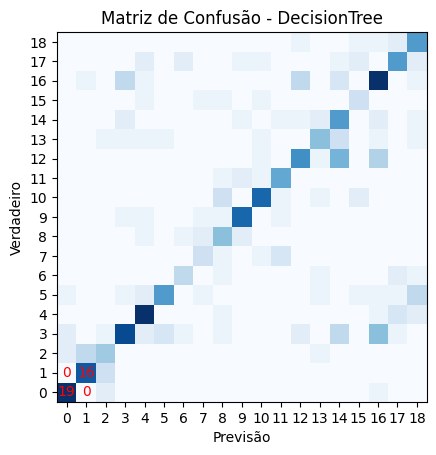

A precisão do classificador é: 56.8 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.79      0.86      0.83        22
               ball_fault_baixo       0.73      0.80      0.76        20
               ball_fault_medio       0.47      0.47      0.47        15
                cage_fault_alto       0.63      0.40      0.49        43
               cage_fault_baixo       0.63      0.73      0.68        26
               cage_fault_medio       0.73      0.44      0.55        25
 desalinhamento_horizontal_alto       0.56      0.50      0.53        10
desalinhamento_horizontal_baixo       0.44      0.44      0.44         9
desalinhamento_horizontal_médio       0.42      0.57      0.48        14
   desalinhamento_vertical_alto       0.71      0.75      0.73        20
  desalinhamento_vertical_baixo       0.71      0.65      0.68        23
  desalinhamento_vertical_médio       0.62      0.71    

In [9]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
metodo = 'KNeighbors'
knn.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", np.round(100*accuracy,2),'%')


Acurácia: 49.87 %


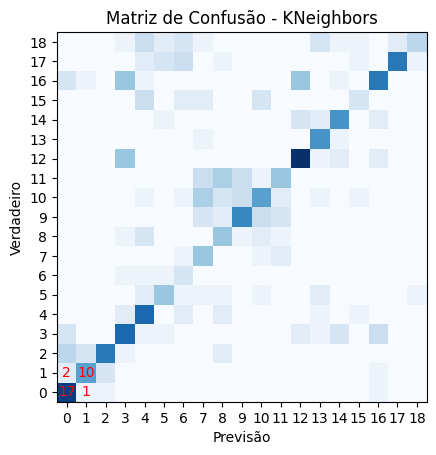

A precisão do classificador é: 49.87 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.57      0.85      0.68        20
               ball_fault_baixo       0.67      0.62      0.65        16
               ball_fault_medio       0.76      0.54      0.63        24
                cage_fault_alto       0.41      0.48      0.44        29
               cage_fault_baixo       0.42      0.64      0.51        22
               cage_fault_medio       0.47      0.44      0.45        16
 desalinhamento_horizontal_alto       0.18      0.50      0.26         6
desalinhamento_horizontal_baixo       0.28      0.64      0.39        11
desalinhamento_horizontal_médio       0.29      0.47      0.36        15
   desalinhamento_vertical_alto       0.57      0.50      0.53        24
  desalinhamento_vertical_baixo       0.45      0.34      0.39        29
  desalinhamento_vertical_médio       0.47      0.32   

In [6]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [7]:
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report

# Dividir o dataset em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Treinar o classificador NuSVC
clf = NuSVC()
metodo = 'NuSVC'
clf.fit(X_train, y_train)

# Realizar as previsões
y_pred = clf.predict(X_test)

# Mostrar os resultados
print(classification_report(y_test, y_pred))

ValueError: specified nu is infeasible

In [ ]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))